## Imports
---

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle


## Load Dataset
---

In [32]:
df = pd.read_csv('Credit Score Classification Dataset.csv')


## EDA
---

In [33]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [34]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


### 1. Unique Values

In [35]:
df.nunique()

Age                   29
Gender                 2
Income                52
Education              5
Marital Status         2
Number of Children     4
Home Ownership         2
Credit Score           3
dtype: int64

### 2. Datatypes

In [36]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


### 3. Statistics

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


### 4. Null Values

In [39]:
df.isna().any()

Age                   False
Gender                False
Income                False
Education             False
Marital Status        False
Number of Children    False
Home Ownership        False
Credit Score          False
dtype: bool

In [40]:
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

### 5. Categorical Values

In [41]:
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
cat_cols

['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

**Label Encode**

In [42]:
le_gender = LabelEncoder()
le_education = LabelEncoder()
le_marital_status = LabelEncoder()
le_home_ownership = LabelEncoder()
le_credit_score = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Education'] = le_education.fit_transform(df['Education'])
df['Marital Status'] = le_marital_status.fit_transform(df['Marital Status'])
df['Home Ownership'] = le_home_ownership.fit_transform(df['Home Ownership'])
df['Credit Score'] = le_credit_score.fit_transform(df['Credit Score'])


bisa gunakan yg atas atau yg bawah

In [43]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

for i in cat_cols:
    # Fit the label encoder object to the dataset
    le.fit(df[i])

    # Transform the dataset using the label encoder object
    df[i] = le.transform(df[i])
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

[]

### 6. Correlation

In [44]:
df.corr()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
Age,1.000000,0.235343,0.699464,0.170254,-0.517723,0.055390,-0.713803,0.205362
Gender,0.235343,1.000000,0.495738,0.248671,0.278362,-0.442139,-0.031519,-0.247729
Income,0.699464,0.495738,1.000000,0.369449,-0.471004,0.084547,-0.704928,0.083698
Education,0.170254,0.248671,0.369449,1.000000,-0.067797,0.047311,-0.397043,0.334424
Marital Status,-0.517723,0.278362,-0.471004,-0.067797,1.000000,-0.696984,0.708374,-0.205756
Number of Children,0.055390,-0.442139,0.084547,0.047311,-0.696984,1.000000,-0.497129,0.136517
Home Ownership,-0.713803,-0.031519,-0.704928,-0.397043,0.708374,-0.497129,1.000000,-0.293384
Credit Score,0.205362,-0.247729,0.083698,0.334424,-0.205756,0.136517,-0.293384,1.000000


<Axes: >

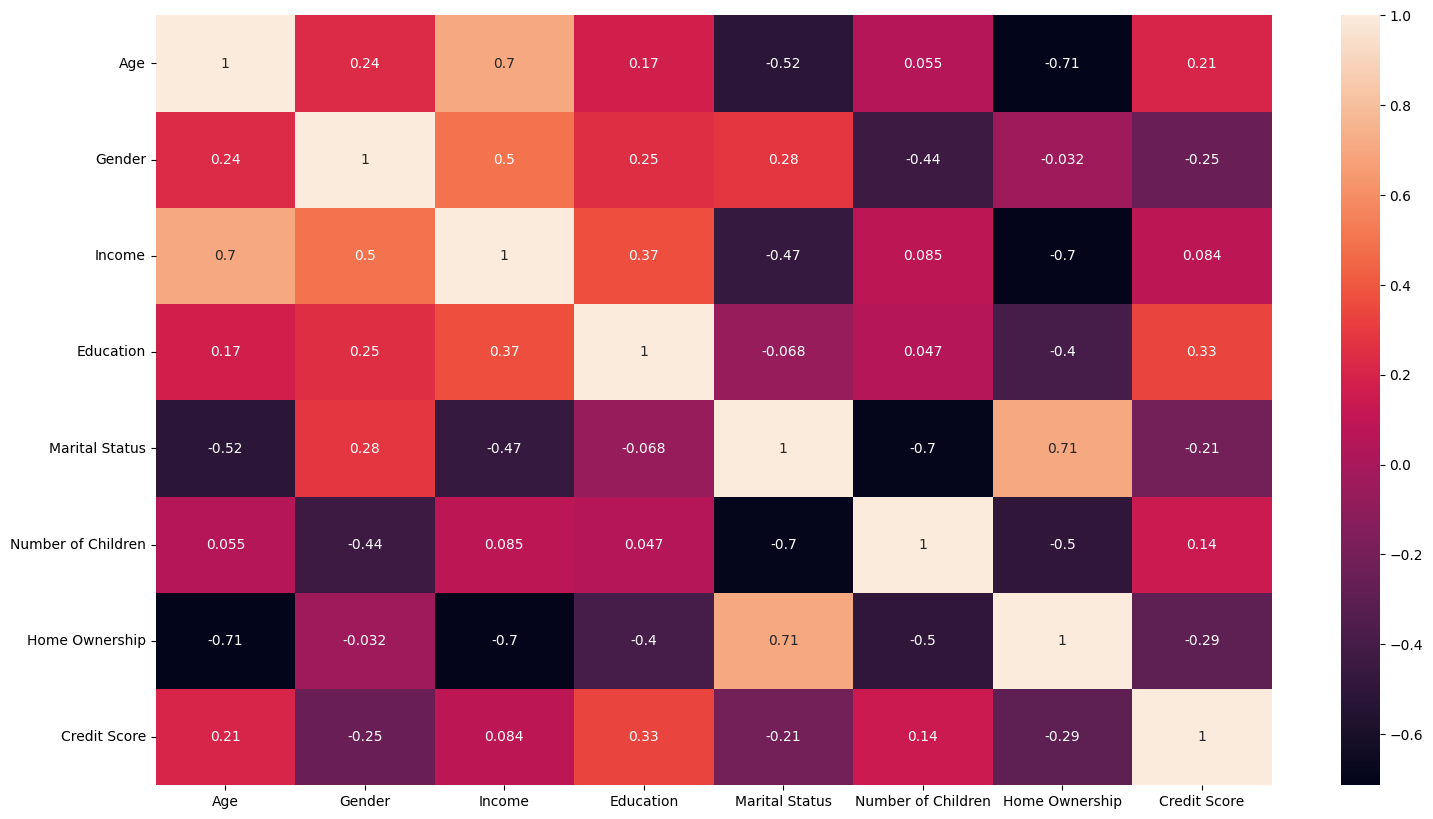

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of figure to 12 by 10.
plt.figure(figsize=(18,10))

sns.heatmap(df.corr(), annot = True)

### 7. Class Distributions

In [46]:
# Count the number of instances in each class
class_counts = df['Credit Score'].value_counts()

# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
Credit Score
1    113
0     36
2     15
Name: count, dtype: int64


## SMOTE
---

In [47]:
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## KNN Model
---

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [50]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.95      0.91      0.93        23
           2       1.00      1.00      1.00         5

    accuracy                           0.91        33
   macro avg       0.87      0.90      0.89        33
weighted avg       0.92      0.91      0.91        33



## Save Model
---

In [51]:
with open('knn_credit_score_model.pkl', 'wb') as f:
    pickle.dump(knn, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)